In [36]:
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt

stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
holidays = pd.read_csv('holidays_events.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
transactions = pd.read_csv('transactions.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [37]:
display(
    print("stores"),
    stores.head(),
    stores.tail(),
    stores.shape,
    print("oil"),
    oil.head(),
    oil.tail(),
    oil.shape,
    print("holidays"),
    holidays.head(),
    holidays.tail(),
    holidays.shape,
    print("test"),
    test.head(),
    test.tail(),
    test.shape,
    print("train"),
    train.head(),
    train.tail(),
    train.shape,
    print("transactions"),
    transactions.head(),
    transactions.tail(),
    transactions.shape,
    print("sample_submission"),
    sample_submission.head(),
    sample_submission.tail(),
    sample_submission.shape
)

stores
oil
holidays
test
train
transactions
sample_submission


None

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


(54, 5)

None

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


(1218, 2)

None

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


(350, 6)

None

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


(28512, 5)

None

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


(3000888, 6)

None

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


(83488, 3)

None

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


,id,sales
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0
28511,3029399,0.0


(28512, 2)

In [38]:
train = train.sort_values(by = ['date'])
test = test.sort_values(by = ['date'])

df = pd.concat([train, test], axis = 0)
display(df.head(), df.tail(), df.info())

df = pd.merge(df, stores, on = 'store_nbr', how = 'left')
df = pd.merge(df, oil, on = 'date', how = 'left')
df = pd.merge(df, transactions, on = ['date', 'store_nbr'], how = 'left')
df = pd.merge(df, holidays, on = ['date'], how = 'left')

display(
    df.head(), df.tail()
    )

<class 'pandas.core.frame.DataFrame'>
Index: 3029400 entries, 0 to 28511
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 161.8+ MB


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1194,1194,2013-01-01,42,CELEBRATION,0.0,0
1193,1193,2013-01-01,42,BREAD/BAKERY,0.0,0
1192,1192,2013-01-01,42,BOOKS,0.0,0
1191,1191,2013-01-01,42,BEVERAGES,0.0,0


,id,date,store_nbr,family,sales,onpromotion
27317,3028205,2017-08-31,25,PET SUPPLIES,NaN,0
27316,3028204,2017-08-31,25,PERSONAL CARE,NaN,6
27315,3028203,2017-08-31,25,MEATS,NaN,1
27326,3028214,2017-08-31,26,BEAUTY,NaN,1
28511,3029399,2017-08-31,9,SEAFOOD,NaN,0


None

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1194,2013-01-01,42,CELEBRATION,0.0,0,Cuenca,Azuay,D,2,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,1193,2013-01-01,42,BREAD/BAKERY,0.0,0,Cuenca,Azuay,D,2,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,1192,2013-01-01,42,BOOKS,0.0,0,Cuenca,Azuay,D,2,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,1191,2013-01-01,42,BEVERAGES,0.0,0,Cuenca,Azuay,D,2,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred
3082855,3028205,2017-08-31,25,PET SUPPLIES,NaN,0,Salinas,Santa Elena,D,1,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082856,3028204,2017-08-31,25,PERSONAL CARE,NaN,6,Salinas,Santa Elena,D,1,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082857,3028203,2017-08-31,25,MEATS,NaN,1,Salinas,Santa Elena,D,1,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082858,3028214,2017-08-31,26,BEAUTY,NaN,1,Guayaquil,Guayas,D,10,47.26,NaN,NaN,NaN,NaN,NaN,NaN
3082859,3029399,2017-08-31,9,SEAFOOD,NaN,0,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.describe()

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions
count,3.082860e+06,3.082860e+06,3.054348e+06,3.082860e+06,3.082860e+06,2.120580e+06,2.805231e+06
mean,1.518250e+06,2.750000e+01,3.590209e+02,2.657692e+00,8.481481e+00,6.780640e+01,1.697071e+03
std,8.742912e+05,1.558579e+01,1.107286e+03,1.236626e+01,4.649735e+00,2.564571e+01,9.668317e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,5.000000e+00
25%,7.618048e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.646000e+01,1.046000e+03
50%,1.521828e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.325000e+01,1.395000e+03
75%,2.272940e+06,4.100000e+01,1.960110e+02,0.000000e+00,1.300000e+01,9.572000e+01,2.081000e+03
max,3.029399e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,8.359000e+03


## plot the curve os sales per date

creating date windows

In [40]:
df['date'] = pd.to_datetime(df['date'])
df['date_month_year'] = df['date'].dt.strftime('%Y-%m')
df['date_month_year'] = pd.to_datetime(df['date_month_year'])

df['date_month'] = df['date'].dt.month
df['date_year'] = df['date'].dt.year



df.sort_values('date', ascending = True, inplace = True)

Text(0.5, 1.0, 'Mean sales per month')

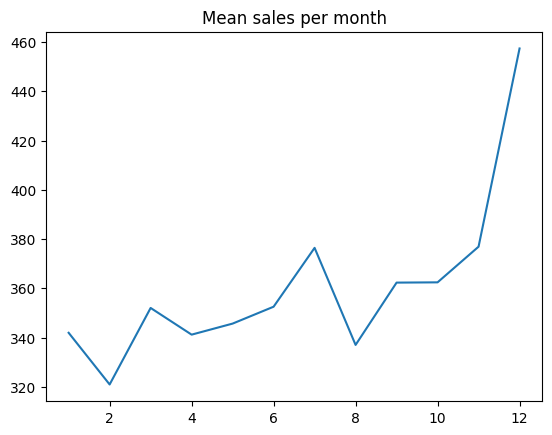

In [41]:


df_sales_per_x = df.groupby('date_month')['sales'].mean()

plt.plot(df_sales_per_x)
plt.title("Mean sales per month")

Text(0.5, 1.0, 'Sales per month/year')

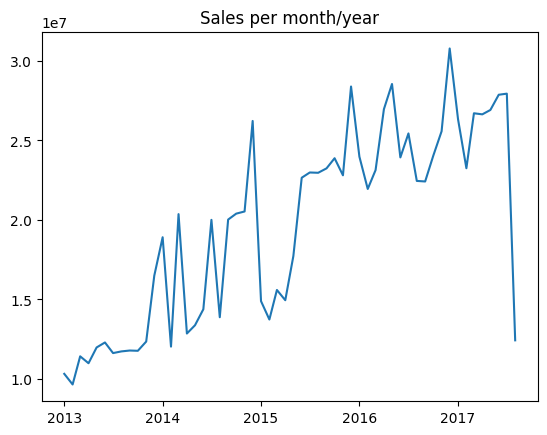

In [42]:

df_sales_per_x = df.groupby(['date_month_year'])['sales'].sum()

plt.plot(df_sales_per_x)
plt.title('Sales per month/year')

Appers that the data haven't finished the month correctly! lets get out the last month

Text(0.5, 1.0, 'Sales per year')

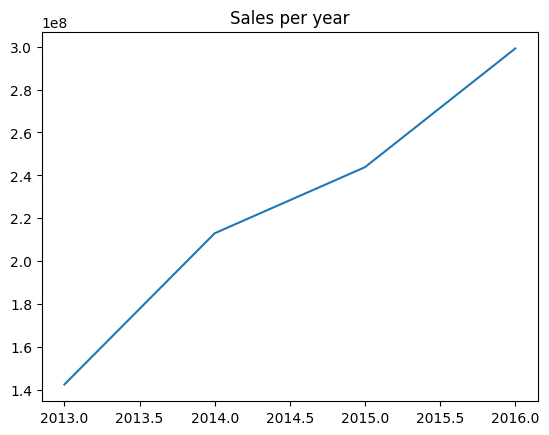

In [43]:

df_sales_per_x = df.groupby(['date_year'])['sales'].sum()

plt.plot(df_sales_per_x[:-1])
plt.title('Sales per year')

what is the annual, monthly, weekly and daily mean increase in the sales?

In [44]:
df_grouped_by_day = df.groupby('date')['sales'].sum()[:-16]

In [45]:
df_grouped_by_day = df.groupby('date')['sales'].sum()[:-16]
df_grouped_by_month = df.groupby('date_month_year')['sales'].sum()[:-1]
df_grouped_by_year = df.groupby('date_year')['sales'].sum()[:-1]

grouped = [
    ("day",   df_grouped_by_day),
    ("month", df_grouped_by_month),
    ("year",  df_grouped_by_year),
]

values = {}

for name, s in grouped:
    start = 0
    values[f'values_{name}'] = []

    for row in range(1, len(s)):
        prev = s.iloc[start]
        now  = s.iloc[row]
        values[f'values_{name}'].append((now / prev) - 1)
        start += 1

for name, _ in grouped:
    lst = values[f'values_{name}']
    mean_inc = sum(lst) / len(lst) if lst else float('nan')
    print(f'Mean increase per {name} is: {mean_inc}')   


Mean increase per day is: 0.33760170951935903
Mean increase per month is: 0.03674093568143099
Mean increase per year is: 0.2888739461987972


Stats models apply

In [46]:
from scipy.stats import boxcox
import plotly.express as px

df_grouped_by_day_boxcox, fitted_lambda = boxcox(df_grouped_by_day)  

fig = px.line(df_grouped_by_day, title = 'Daily Sales Over Time (Box-Cox Transformed)')

fig.show()

In [47]:
from scipy.stats import boxcox

df_grouped_by_day_boxcox, fitted_lambda = boxcox(df_grouped_by_day)  

fig = px.line(df_grouped_by_day_boxcox, title = 'Daily Sales Over Time (Box-Cox Transformed)')

fig.show()

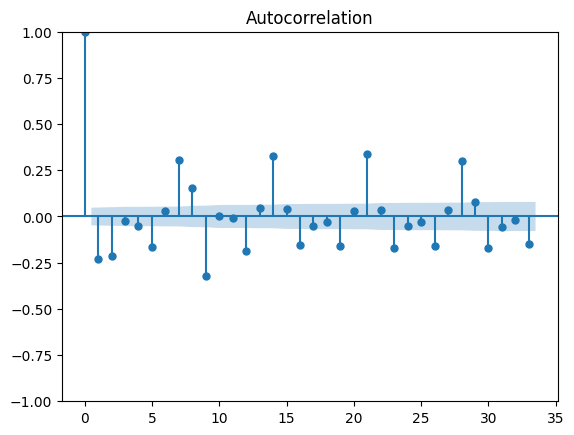

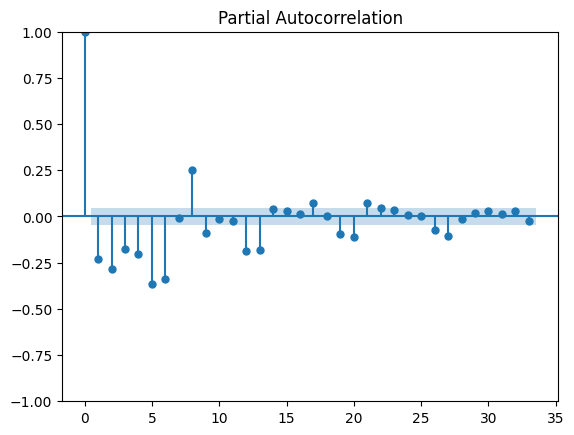

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df_grouped_by_day_boxcox = pd.DataFrame(df_grouped_by_day_boxcox, columns=['sales_boxcox'])

df_grouped_by_day_boxcox['sales_boxcox_diff'] = df_grouped_by_day_boxcox['sales_boxcox'].diff()
df_grouped_by_day_boxcox.dropna(inplace=True)

plot_acf(df_grouped_by_day_boxcox['sales_boxcox_diff'])
plot_pacf(df_grouped_by_day_boxcox['sales_boxcox_diff'], method='ywm')
plt.show()


In [49]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox

train = df_grouped_by_day_boxcox[:-int(len(df_grouped_by_day_boxcox)*0.2)]
test = df_grouped_by_day_boxcox[-int(len(df_grouped_by_day_boxcox)*0.2):]


model = ARIMA(train['sales_boxcox'], order=(1,1,1)).fit()
boxcox_forecast = model.forecast(steps=len(test))
forecast = inv_boxcox(boxcox_forecast, fitted_lambda)



c:\Users\xd-bo\Desktop\projects\Store-Sales---Time-Series-Forecasting---Kaggle-Competition\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\xd-bo\Desktop\projects\Store-Sales---Time-Series-Forecasting---Kaggle-Competition\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\xd-bo\Desktop\projects\Store-Sales---Time-Series-Forecasting---Kaggle-Competition\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\xd-bo\Desktop\projects\Store-Sales---Time-Series-Forecasting---Kaggle-Competition\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginn

In [73]:
test_df = inv_boxcox(test, fitted_lambda)

In [76]:
forecast

1347   731374.86
1348   750491.96
1349   757304.70
1350   759716.04
1351   760567.49
          ...   
1678   761031.54
1679   761031.54
1680   761031.54
1681   761031.54
1682   761031.54
Name: predicted_mean, Length: 336, dtype: float64

In [ ]:
test_df['sales_boxcox']

,sales_boxcox,sales_boxcox_diff
1348,603427.95,NaN
1349,624262.07,25.55
1350,568324.81,NaN
1351,691912.60,1149.58
1352,899219.30,2843.20
...,...,...
1679,826373.72,2101.13
1680,792630.54,NaN
1681,865639.68,231.28
1682,760922.41,NaN


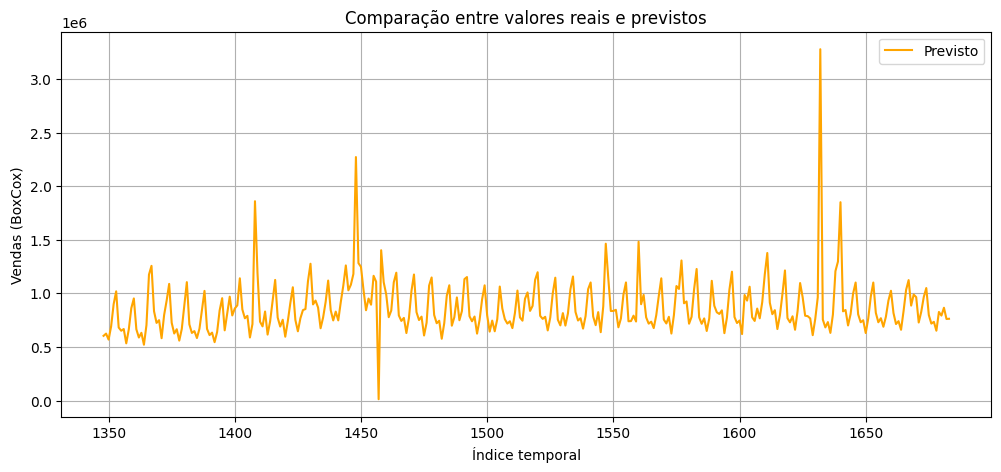

In [83]:

plt.figure(figsize=(12,5))
plt.plot(test_df.index, test_df['sales_boxcox'], label='Previsto', color='orange')

plt.title('Comparação entre valores reais e previstos')
plt.xlabel('Índice temporal')
plt.ylabel('Vendas (BoxCox)')
plt.legend()
plt.grid(True)
plt.show()


## Promotion impact in sales?

In [50]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred,date_month_year,date_month,date_year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013
1194,890,2013-01-01,33,SEAFOOD,0.0,0,Quevedo,Los Rios,C,3,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013
1193,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013
1192,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013
1191,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081665,3029394,2017-08-31,9,PLAYERS AND ELECTRONICS,NaN,0,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017
3081664,3029395,2017-08-31,9,POULTRY,NaN,1,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017
3081663,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017
3081674,3029386,2017-08-31,9,LADIESWEAR,NaN,0,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017


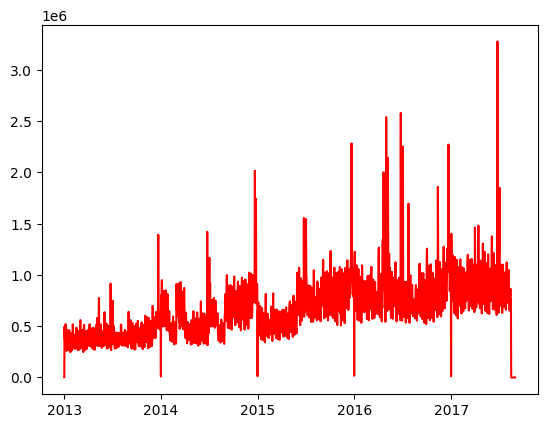

In [51]:
df_grouped = df.groupby('date').agg(
    {'sales': 'sum', 
    'onpromotion': 'sum'}
)


df_grouped_2 = df_grouped

df_grouped_2 = df_grouped_2.reset_index()
df_grouped_2

fig, ax1 = plt.subplots()

ax1.plot(df_grouped_2['date'], df_grouped_2['sales'], color='red', label='Sales')

plt.show()

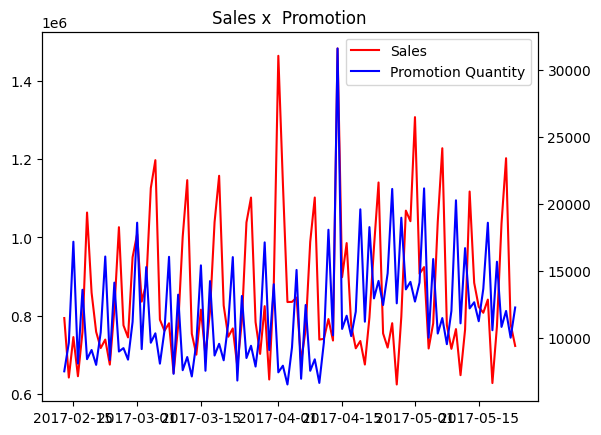

In [52]:
df_grouped = df.groupby('date').agg(
    {'sales': 'sum', 
    'onpromotion': 'sum'}
)


df_grouped_2 = df_grouped.iloc[-200:-100]

df_grouped_2 = df_grouped_2.reset_index()
df_grouped_2

fig, ax1 = plt.subplots()

ax1.plot(df_grouped_2['date'], df_grouped_2['sales'], color='red', label='Sales')

ax2 = ax1.twinx()

ax2.plot(df_grouped_2['date'], df_grouped_2['onpromotion'], color='blue', label='Promotion Quantity')

plt.title('Sales x  Promotion')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

In [53]:
print(f"correlation of onpromotion and sales: {df['onpromotion'].corr(df['sales'])}")

df_mod = df.dropna()

spearman_coef, p_value = stats.spearmanr(
    list(df_mod['onpromotion']), 
    list(df_mod['sales'])
    )

print(f"Spearman coef: {spearman_coef}")
print(f"p-value: {p_value}")

correlation of onpromotion and sales: 0.4282410665192608
Spearman coef: 0.5755201804304136
p-value: 0.0


Yes, the quantity of products in promotion can change the entire flow of sales in this company

## Is Holiday can cause negative results to sales?

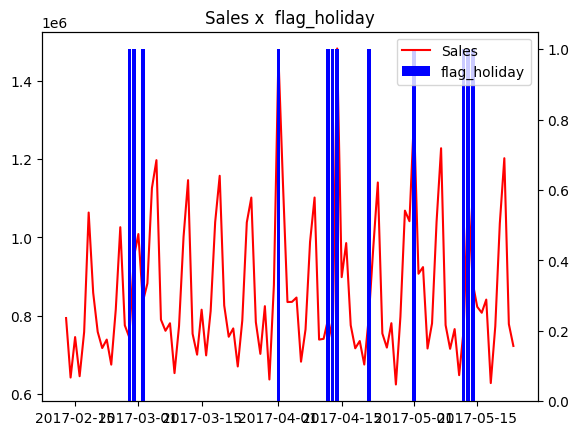

In [54]:
df.loc[~df['type_y'].isnull(), 'flag_holiday'] = 1

df['flag_holiday'] = df['flag_holiday'].fillna(0)

df_grouped = df.groupby('date').agg(
    {'sales': 'sum', 
    'flag_holiday': 'max'}
)

df_grouped_2 = df_grouped.iloc[-200:-100]

df_grouped_2 = df_grouped_2.reset_index()

fig, ax1 = plt.subplots()

ax1.plot(df_grouped_2['date'], df_grouped_2['sales'], color='red', label='Sales')

ax2 = ax1.twinx()

ax2.bar(df_grouped_2['date'], df_grouped_2['flag_holiday'], color='blue', label='flag_holiday')

plt.title('Sales x  flag_holiday')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

In [55]:
display(
    df.groupby('flag_holiday')['sales'].mean(),
    df.groupby('locale')['sales'].mean()   
)

flag_holiday
0.0    352.159181
1.0    393.864762
Name: sales, dtype: float64

locale
Local       366.165397
National    416.751069
Regional    387.005786
Name: sales, dtype: float64

In [56]:
df.loc[df['locale'] == "National", 'flag_national_locale'] = 1
df['flag_national_locale'] = df['flag_national_locale'].fillna(0)

df.groupby('flag_national_locale')['sales'].mean()




flag_national_locale
0.0    353.605234
1.0    416.751069
Name: sales, dtype: float64

Actually we see a different cenarious. don't have different in sales if it is holiday or not, insted of we have a national holidays, in this case, we see a higher avg sale than the others day

## the last 7 or 1 days can be more powerfull in sales than the rest of the month?

In [57]:
df2 = df.copy()

df2['date'] = pd.to_datetime(df2['date'])


df2.loc[df2['date'].dt.day >= (31-7), 'flag_last_week'] = 1
df2['flag_last_week'] = df2['flag_last_week'].fillna(0)
df2.groupby('flag_last_week')['sales'].sum()/1000000

flag_last_week
0.0    840.443027
1.0    256.131717
Name: sales, dtype: float64

In [58]:

df2 = df.copy()

df2['date'] = pd.to_datetime(df2['date'])
df2.loc[df2['date'].dt.day >= (31-1), 'flag_last_week'] = 1

df2['flag_last_week'] = df2['flag_last_week'].fillna(0)
df2.groupby('flag_last_week')['sales'].sum()/1000000

flag_last_week
0.0    1041.629544
1.0      54.945200
Name: sales, dtype: float64

the last day may be more explainable than last week

## See if the descriptions of holidays have some different comparing sales

In [59]:
df.groupby('description')['sales'].mean().sort_values(ascending = False)

description
Traslado Primer dia del ano                   786.928379
Terremoto Manabi+2                            755.286535
Terremoto Manabi+1                            713.711414
Terremoto Manabi+15                           712.750397
Terremoto Manabi+3                            646.514707
                                                 ...    
Recupero puente primer dia del ano            226.295293
Mundial de futbol Brasil: Ecuador-Honduras    207.186751
Mundial de futbol Brasil: Ecuador-Francia     199.406508
Inauguracion Mundial de futbol Brasil         184.853012
Primer dia del ano                              5.881391
Name: sales, Length: 101, dtype: float64

## Cleaning data

In [60]:
df.describe()

,id,date,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,date_month_year,date_month,date_year,flag_holiday,flag_national_locale
count,3.082860e+06,3082860,3.082860e+06,3.054348e+06,3.082860e+06,3.082860e+06,2.120580e+06,2.805231e+06,3082860,3.082860e+06,3.082860e+06,3.082860e+06,3.082860e+06
mean,1.518250e+06,2015-05-04 08:51:53.063583488,2.750000e+01,3.590209e+02,2.657692e+00,8.481481e+00,6.780640e+01,1.697071e+03,2015-04-19 15:21:26.011560704,6.239306e+00,2.014862e+03,1.635838e-01,8.497110e-02
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,5.000000e+00,2013-01-01 00:00:00,1.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00
25%,7.618048e+05,2014-03-05 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.646000e+01,1.046000e+03,2014-03-01 00:00:00,3.000000e+00,2.014000e+03,0.000000e+00,0.000000e+00
50%,1.521828e+06,2015-05-06 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.325000e+01,1.395000e+03,2015-05-01 00:00:00,6.000000e+00,2.015000e+03,0.000000e+00,0.000000e+00
75%,2.272940e+06,2016-07-02 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,1.300000e+01,9.572000e+01,2.081000e+03,2016-07-01 00:00:00,9.000000e+00,2.016000e+03,0.000000e+00,0.000000e+00
max,3.029399e+06,2017-08-31 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,8.359000e+03,2017-08-01 00:00:00,1.200000e+01,2.017000e+03,1.000000e+00,1.000000e+00
std,8.742912e+05,NaN,1.558579e+01,1.107286e+03,1.236626e+01,4.649735e+00,2.564571e+01,9.668317e+02,NaN,3.362917e+00,1.355200e+00,3.698975e-01,2.788387e-01


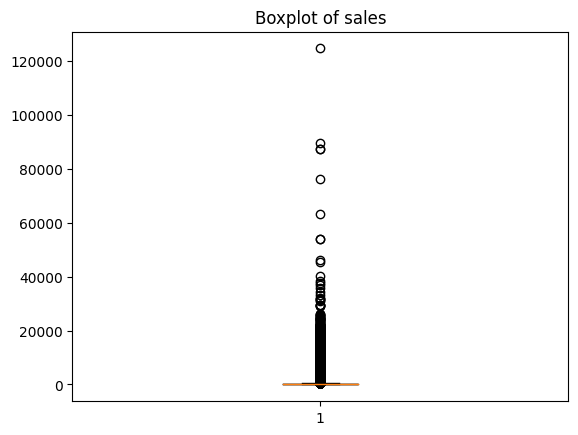

Number of outliers in sales: 455506


In [61]:
plt.boxplot(df['sales'].dropna())
plt.title('Boxplot of sales')
plt.show()

df['sales'].dropna().count()


Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]
print(f'Number of outliers in sales: {len(outliers)}')

df_cleaned = df.loc[~df['id'].isin(outliers['id'])]


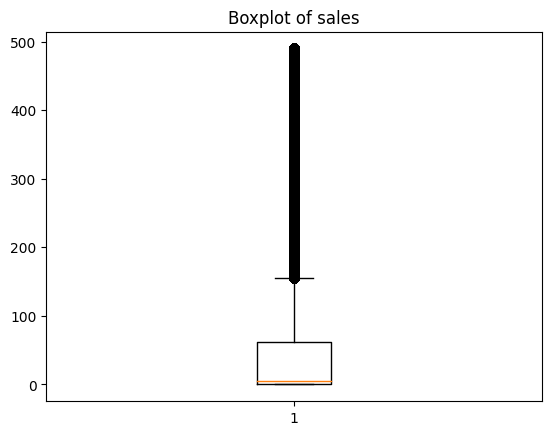

In [62]:
plt.boxplot(df_cleaned['sales'].dropna())
plt.title('Boxplot of sales')
plt.show()

Normalize data

In [63]:
import numpy as np
df_cleaned.select_dtypes(include=np.number)

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,date_month,date_year,flag_holiday,flag_national_locale
0,0,1,0.0,0,13,NaN,NaN,1,2013,1.0,1.0
1194,890,33,0.0,0,3,NaN,NaN,1,2013,1.0,1.0
1193,2,1,0.0,0,13,NaN,NaN,1,2013,1.0,1.0
1192,3,1,0.0,0,13,NaN,NaN,1,2013,1.0,1.0
1191,4,1,0.0,0,13,NaN,NaN,1,2013,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3081665,3029394,9,NaN,0,6,47.26,NaN,8,2017,0.0,0.0
3081664,3029395,9,NaN,1,6,47.26,NaN,8,2017,0.0,0.0
3081663,3029396,9,NaN,0,6,47.26,NaN,8,2017,0.0,0.0
3081674,3029386,9,NaN,0,6,47.26,NaN,8,2017,0.0,0.0


In [64]:
pd.set_option('display.float_format', '{:.2f}'.format)

df_cleaned.describe()

,id,date,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,date_month_year,date_month,date_year,flag_holiday,flag_national_locale
count,2627354.00,2627354,2627354.00,2598842.00,2627354.00,2627354.00,1825583.00,2350539.00,2627354,2627354.00,2627354.00,2627354.00,2627354.00
mean,1492798.49,2015-04-20 01:23:24.572662016,27.33,58.90,0.89,8.40,68.48,1619.22,2015-04-05 06:52:07.163221760,6.22,2014.82,0.16,0.08
min,0.00,2013-01-01 00:00:00,1.00,0.00,0.00,1.00,26.19,5.00,2013-01-01 00:00:00,1.00,2013.00,0.00,0.00
25%,727718.50,2014-02-14 00:00:00,14.00,0.00,0.00,4.00,46.66,1013.00,2014-02-01 00:00:00,3.00,2014.00,0.00,0.00
50%,1479933.50,2015-04-13 00:00:00,27.00,5.00,0.00,8.00,53.80,1351.00,2015-04-01 00:00:00,6.00,2015.00,0.00,0.00
75%,2253480.75,2016-06-21 00:00:00,40.00,61.93,0.00,13.00,95.95,1947.00,2016-06-01 00:00:00,9.00,2016.00,0.00,0.00
max,3029399.00,2017-08-31 00:00:00,54.00,490.02,646.00,17.00,110.62,8359.00,2017-08-01 00:00:00,12.00,2017.00,1.00,1.00
std,878216.93,NaN,15.38,106.72,4.97,4.66,25.76,909.88,NaN,3.35,1.36,0.37,0.28


In [65]:
df_cleaned.tail(50)


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,type_y,locale,locale_name,description,transferred,date_month_year,date_month,date_year,flag_holiday,flag_national_locale
3081654,3029349,2017-08-31,8,HOME AND KITCHEN I,NaN,1,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081653,3029350,2017-08-31,8,HOME AND KITCHEN II,NaN,3,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081652,3029351,2017-08-31,8,HOME APPLIANCES,NaN,0,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081651,3029352,2017-08-31,8,HOME CARE,NaN,1,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081650,3029353,2017-08-31,8,LADIESWEAR,NaN,0,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081649,3029354,2017-08-31,8,LAWN AND GARDEN,NaN,0,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081648,3029355,2017-08-31,8,LINGERIE,NaN,1,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081659,3029345,2017-08-31,8,FROZEN FOODS,NaN,1,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081647,3029356,2017-08-31,8,"LIQUOR,WINE,BEER",NaN,2,Quito,Pichincha,D,8,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081645,3029370,2017-08-31,9,BEVERAGES,NaN,28,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00


In [66]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,type_y,locale,locale_name,description,transferred,date_month_year,date_month,date_year,flag_holiday,flag_national_locale
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013,1.00,1.00
1194,890,2013-01-01,33,SEAFOOD,0.00,0,Quevedo,Los Rios,C,3,...,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013,1.00,1.00
1193,2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013,1.00,1.00
1192,3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013,1.00,1.00
1191,4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,2013,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081665,3029394,2017-08-31,9,PLAYERS AND ELECTRONICS,NaN,0,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081664,3029395,2017-08-31,9,POULTRY,NaN,1,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081663,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
3081674,3029386,2017-08-31,9,LADIESWEAR,NaN,0,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,8,2017,0.00,0.00
